<a href="https://colab.research.google.com/github/Fatemeh-Vahidnezhad/MY-PROJECTS/blob/main/Sentiment_Analysis_with_Bert_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import shutil
import random
import pandas as pd
import matplotlib.pyplot as plt

##Download the Dataset

In [2]:
!wget 'https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz'
 

--2022-04-01 18:31:53--  https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz’

aclImdb_v1.tar.gz   100%[===================>]  80.23M  33.7MB/s    in 2.4s    

2022-04-01 18:31:56 (33.7 MB/s) - ‘aclImdb_v1.tar.gz’ saved [84125825/84125825]



In [3]:
!tar -xf aclImdb_v1.tar.gz

In [4]:
base_dir = '/content/aclImdb'
train_dir = '/content/aclImdb/train'
test_dir = '/content/aclImdb/test'

removing unsup category form dataset:

In [5]:
!rm -r '/content/aclImdb/train/unsup'

##Preprocess the train *dataset*:

1. appending all text files into a list
2. converting the list to the dataframe by pandas library

make a dataframe from the neg directory of train dataset:

In [6]:
os.chdir('/content/aclImdb/train/neg')
fnames = os.listdir(train_dir + '/' + 'neg')
text_neg = []
for fname in fnames:
  with open(fname) as f:
    text_neg.append(f.read())
df_neg = pd.DataFrame(text_neg, columns = ['text']) 
df_neg['label'] = 0
df_neg  

,text,label
0,Well I watched this last night and the one thi...,0
1,"William S. Hart (as Jim Treen), the most eligi...",0
2,For the life of me I can't figure out why anyo...,0
3,Maya is a woman without any interests. She jus...,0
4,There is a level of high expectation when you ...,0
...,...,...
12495,"First of all, the actor they have to play Jesu...",0
12496,Something somewhere must have terribly gone wr...,0
12497,"This movie was messed up. A sequel to ""John Ca...",0
12498,"I'm a great admirer of Lon Chaney, but the scr...",0


make a dataframe from the pos directory of train dataset:

In [7]:
os.chdir('/content/aclImdb/train/pos')
fnames = os.listdir(train_dir + '/' + 'pos')
text_pos = []
for fname in fnames:
  with open(fname) as f:
    text_pos.append(f.read())
df_pos = pd.DataFrame(text_pos, columns = ['text']) 
df_pos['label'] = 1




appending the two dataframe of negative and positive text in the train set:


In [8]:
df = df_neg.append(df_pos)
df

,text,label
0,Well I watched this last night and the one thi...,0
1,"William S. Hart (as Jim Treen), the most eligi...",0
2,For the life of me I can't figure out why anyo...,0
3,Maya is a woman without any interests. She jus...,0
4,There is a level of high expectation when you ...,0
...,...,...
12495,Fabulous film! Rented the DVD recently and was...,1
12496,If you are looking for a definitive biography ...,1
12497,"Ok, so it borrows a little from ""It's a Wonder...",1
12498,"Riveting drama, scripted by William Mastrosimo...",1


##Shuffle the train set

In [9]:
df = df.sample(frac = 1)

In [10]:
df.label.value_counts()
df.value_counts()

# df.drop_duplicates(subset = ['text'], inplace = True)
df.label.value_counts()


1    12500
0    12500
Name: label, dtype: int64

##Preprocess the test *dataset*:

1. appending all text files into a list
2. converting the list to the dataframe by pandas library

make a dataframe from the neg directory of the test dataset:

In [11]:
os.chdir('/content/aclImdb/test/neg')
fnames = os.listdir(test_dir + '/' + 'neg')
test_text_neg = []
for fname in fnames:
  with open(fname) as f:
    test_text_neg.append(f.read())
df_neg_test = pd.DataFrame(test_text_neg, columns = ['text']) 
df_neg_test['label'] = 0
df_neg_test  

,text,label
0,The problem with this- and with all Vietnam Wa...,0
1,"Okay, first I should say that I assume this wa...",0
2,That is the answer. The question is: What is t...,0
3,"Before I really slag this film off, I just wan...",0
4,"I never saw the other two ""Ninja"" movies and f...",0
...,...,...
12495,"Ugly, heartless Hollywood crap that expects no...",0
12496,"As main ""character"" Lillith Silver likes to po...",0
12497,This is an odd movie. On the surface it's no d...,0
12498,"OK, please believe me when I say that this is ...",0


make a dataframe from the pos directory of the test dataset:

In [12]:
os.chdir('/content/aclImdb/test/pos')
fnames = os.listdir(test_dir + '/' + 'pos')
test_text_pos = []
for fname in fnames:
  with open(fname) as f:
    test_text_pos.append(f.read())
df_pos_test = pd.DataFrame(test_text_pos, columns = ['text']) 
df_pos_test['label'] = 1
df_pos_test

,text,label
0,This tearful movie about a sister and her batt...,1
1,As I peruse through the hundreds of comments t...,1
2,Many people have the irritating habit of dying...,1
3,Perhaps one of the best movies ever made. Orry...,1
4,I am huge movie enthusiast and also an active ...,1
...,...,...
12495,"I thoroughly enjoyed this film, which in many ...",1
12496,I gave this a 10 because it's the best film of...,1
12497,RENDITION is a film not to miss with solid wri...,1
12498,"This is definitely Nolan's most intimite,and t...",1


append the two dataframe of negative and positive text:

In [13]:
df_test = df_pos_test.append(df_neg_test)
df_test

,text,label
0,This tearful movie about a sister and her batt...,1
1,As I peruse through the hundreds of comments t...,1
2,Many people have the irritating habit of dying...,1
3,Perhaps one of the best movies ever made. Orry...,1
4,I am huge movie enthusiast and also an active ...,1
...,...,...
12495,"Ugly, heartless Hollywood crap that expects no...",0
12496,"As main ""character"" Lillith Silver likes to po...",0
12497,This is an odd movie. On the surface it's no d...,0
12498,"OK, please believe me when I say that this is ...",0


##Shuffle the test set

In [14]:
df_test = df_test.sample(frac = 1)

In [15]:
x_test = df_test['text']
y_test = df_test['label']

In [16]:
x_test

7800     Most of the comments so far have nailed this o...
2060     20 Years later and this movie still has echoes...
9714     **Maybe spoilers** **hard to spoil this thing ...
1769     This, in my opinion, is a very poor movie that...
9435     My god how bad this is. Who is this impostor p...
                               ...                        
6414     The dead spots and picture-postcard superficia...
1880     Back when in the States, I was like about 7 or...
3154     I think "category 6: day of destruction" was v...
11531    Unfortunately, I've never seen the full versio...
2263     These guys combine low-brow with low-budget. I...
Name: text, Length: 25000, dtype: object

Split the train dataset to train set and validation set by Sklearn library

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_val, y_train, y_val = train_test_split(df['text'], df['label'],  test_size=0.25, random_state=42)

In [19]:
x_train.shape
y_train.shape
print('y_train\n', y_train.value_counts())
print('\n y_val\n', y_val.value_counts())

y_train
 0    9389
1    9361
Name: label, dtype: int64

 y_val
 1    3139
0    3111
Name: label, dtype: int64


##Create a BERT Model

In [20]:
!pip install tensorflow_text

     |████████████████████████████████| 4.9 MB 5.4 MB/s 
     |████████████████████████████████| 462 kB 44.7 MB/s 


In [21]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub
import tensorflow_text as text

In [22]:
preprocess_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'
model_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4'
bert_preprocess_model = hub.KerasLayer(preprocess_url)
bert_model_url = hub.KerasLayer(model_url)


In [23]:
inputs = tf.keras.layers.Input(shape = (), dtype = tf.string, name = 'InputLayer')
preprocessed_text = bert_preprocess_model(inputs)
x = bert_model_url(preprocessed_text)['pooled_output']
outputs = tf.keras.layers.Dense(1, activation = 'sigmoid', name = 'outputLayer')(x)
model = tf.keras.Model(inputs, outputs)

In [24]:
model.compile(loss = 'binary_crossentropy',
             optimizer = 'Adam',
             metrics = ['accuracy'])

In [25]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 InputLayer (InputLayer)        [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_word_ids':   0           ['InputLayer[0][0]']             
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128)}                                                      

Fit the model and evaluate the model with the test dataset:

In [36]:
history = model.fit(x_train, y_train, validation_data = (x_val, y_val) , epochs = 5, verbose = 2)
history

Epoch 1/5
586/586 - 516s - loss: 0.5686 - accuracy: 0.7196 - val_loss: 0.5493 - val_accuracy: 0.7435 - 516s/epoch - 880ms/step
Epoch 2/5
586/586 - 515s - loss: 0.5409 - accuracy: 0.7418 - val_loss: 0.5301 - val_accuracy: 0.7472 - 515s/epoch - 878ms/step
Epoch 3/5
586/586 - 515s - loss: 0.5269 - accuracy: 0.7495 - val_loss: 0.5146 - val_accuracy: 0.7581 - 515s/epoch - 879ms/step
Epoch 4/5
586/586 - 515s - loss: 0.5146 - accuracy: 0.7549 - val_loss: 0.5060 - val_accuracy: 0.7584 - 515s/epoch - 878ms/step
Epoch 5/5
586/586 - 513s - loss: 0.5057 - accuracy: 0.7585 - val_loss: 0.4977 - val_accuracy: 0.7672 - 513s/epoch - 875ms/step


In [37]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 517s 661ms/step - loss: 0.4992 - accuracy: 0.7636


[0.49922940135002136, 0.7635599970817566]

##Visualizing the Accuracy and Loss Functions of the Model

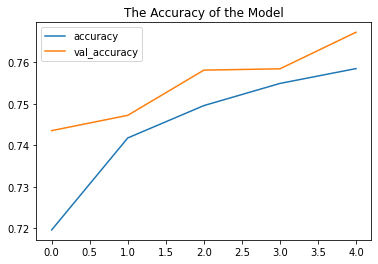

In [38]:
plt.plot(range(len(history.history['accuracy'])), history.history['accuracy'])
plt.plot(range(len(history.history['val_accuracy'])), history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('The Accuracy of the Model')
plt.show()

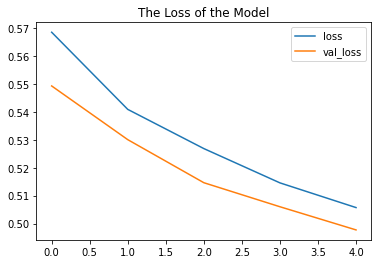

In [39]:
plt.plot(range(len(history.history['loss'])), history.history['loss'])
plt.plot(range(len(history.history['val_loss'])), history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('The Loss of the Model')
plt.show()

##Save the Model in Local Computer

In [40]:
os.getcwd()
# os.chdir('/content')

'/content/aclImdb/test/pos'

In [ ]:
os.mkdir('/content/saved_model/')

In [32]:
model.save('/content/saved_model/3/')

INFO:tensorflow:Assets written to: /content/saved_model/3/assets


INFO:tensorflow:Assets written to: /content/saved_model/3/assets


Saving the model in the local computer 

In [33]:
!zip saved_model/3.zip /content/saved_model/3

zip I/O error: No such file or directory
zip error: Could not create output file (saved_model/3.zip)


#sample data

In [42]:
txt1 = !cat /content/aclImdb/train/neg/10011_3.txt
txt2 = !cat /content/aclImdb/train/neg/10048_4.txt
txt3 = !cat /content/aclImdb/train/pos/10167_7.txt
txt4 = !cat /content/aclImdb/train/pos/10317_7.txt

lst = txt1 + txt2 + txt3 + txt4
df_sample = pd.DataFrame(lst)
df_sample

,0
0,This film is about a male escort getting invol...
1,Masters of Horror: The Screwfly Solution start...
2,"i wasn't a fan of seeing this movie at all, bu..."
3,You know how Star Trek fans flocked to all the...


In [43]:
model.predict(df_sample)

array([[0.26614967],
       [0.5743303 ],
       [0.5132896 ],
       [0.8245003 ]], dtype=float32)